# Selección de Variables: Random Forest

Aqui hacemos un analisis un poco diferente usando el algoritmo de random forest. A diferencia de los algoritmos de regresión logística y CBI, random forest tiene una propiedad que nos permite conocer la importancia de cada una de las variables para predecir a la clase objetivo. 

Primero debemos saber con cuantos arboles el rendimiento del algoritmo converge, para esto una selección de modelos para saber cuantos arboles son los apropiados para el random forest y despues usando ese numero de arboles calcularemos la importancia de als variables segun el random forests. Finalmente haremos una seleccion de variables tomando la importancia de las variables segun el random forest.

 Comó implementar un Random Forest con Scikit-Learn

Esta es una pequeña muestra de como implementar un Random Forest con Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import proyecto_ml
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Cargamos los datos

In [2]:
datos = pd.read_csv('datos_seleccionados.csv' )

Dividimos los datos

In [3]:
X = datos.drop(columns=['obesidad'])
Y = datos['obesidad']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

Entrenamos el algoritmo

In [5]:
clf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

Evaluamos el modelo

In [6]:
f_test = clf.predict(X_test)
proyecto_ml.porcentaje_de_aciertos(f_test,Y_test)

84.52012383900929

Veamos como podemos obtener las importancias de las variables

In [7]:
importancia_de_las_variables = pd.DataFrame(X_train.columns,columns = ['variables'])
importancia_de_las_variables['importancia'] = clf.feature_importances_
importancia_de_las_variables =  importancia_de_las_variables.sort_values('importancia', ascending = False)
importancia_de_las_variables

,variables,importancia
5,aes_peso,0.123356
3,peso_ehoy,0.099959
1,Ainsulina,0.089717
0,peso_act,0.088449
2,peso1,0.077507
14,estatura,0.044584
21,Apuesto,0.040514
17,id_gestud,0.033754
27,Atio_diabeticos,0.031938
23,estres10,0.026162


# ¿Cuantos Arboles Son Necesarios Para Obtener una Buen Rednimiento?

Para saber cuantos arboles es necesario usar para entrenar el random forest neceseitamos haremos una gráfica con el porcentaje de aciertos vs numero de arboles empleados usando siempre el mismo set de test y de trainin

In [8]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

In [9]:
rango = np.linspace(10,10000,num = 100)
#rango = np.linspace(10,10000,num = 2)
numero_de_arboles = []
porcentaje_aciertos = []
count = 1

for i in tqdm(rango):
    arboles = int(i)
    count =  count + 1
    
    bosque = RandomForestClassifier(n_estimators=arboles, random_state=0)
    bosque.fit(X_train, Y_train)
    f_test = bosque.predict(X_test)
    porc_aciertos = proyecto_ml.porcentaje_de_aciertos(f_test,Y_test)
    
    numero_de_arboles.append(arboles)
    porcentaje_aciertos.append(porc_aciertos)

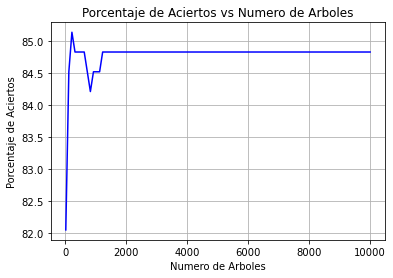

In [10]:
plt.plot(numero_de_arboles,porcentaje_aciertos,'b')
plt.grid(True)
plt.title('Porcentaje de Aciertos vs Numero de Arboles')
plt.xlabel('Numero de Arboles')
plt.ylabel('Porcentaje de Aciertos')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

Notemos que para bosques mayores de 2000 arboles el numero de aciertos parece conveger. Por esta razon de ahora en adelante solo usaremos bosques de 2000 arboles

# Obtenemos la Lista de las Variables más Imortantes

Entrenamos un bosque con todos los datos y obtenemos la lista de las variables más importantes

In [11]:
N_arboles = 2000  # numero de arboles razonable 8000

In [12]:
X = datos.drop(columns = ['obesidad'])
Y = datos['obesidad']
bosque = RandomForestClassifier(n_estimators=N_arboles, random_state=0)
bosque.fit(X,Y)

RandomForestClassifier(n_estimators=2000, random_state=0)

In [13]:
importancia_de_las_variables = pd.DataFrame(X_train.columns,columns = ['variables'])
importancia_de_las_variables['importancia'] = bosque.feature_importances_
importancia_de_las_variables =  importancia_de_las_variables.sort_values('importancia', ascending = False)
importancia_de_las_variables

,variables,importancia
5,aes_peso,0.116439
3,peso_ehoy,0.099123
1,Ainsulina,0.092898
0,peso_act,0.084104
2,peso1,0.067894
14,estatura,0.047805
21,Apuesto,0.042823
17,id_gestud,0.036839
27,Atio_diabeticos,0.033313
23,estres10,0.028467


## Selección de Variables

Con la lista de variables obtenidas en el paso anterior hacemos uns pequeña selección de variables usando validación cruzada

In [14]:
variables_orden_importancia = list(importancia_de_las_variables['variables'])
variables_en_uso = []
error_min = np.inf
#no_iteraciones = 50 #50
no_iteraciones = 20
errores_test = []
errores_train = []

for variables in tqdm(variables_orden_importancia):
    variables_en_uso.append(variables)
    
    err_test , err_train = proyecto_ml.cross_validation(datos[variables_en_uso + ['obesidad']], 'obesidad', no_iteraciones, modelo = 'random_forest')
    errores_test.append(err_test)
    errores_train.append(err_train)
    
    if err_test < error_min:
        variables_optimas = list(variables_en_uso)
        error_min = err_test
        

In [15]:
print('Las variables para el modelo más optimo son:')
print(variables_optimas)
print('El modelo que usa estas variables tuvo un error en los datos de entrenamiento de: ' + str(error_min))  

Las variables para el modelo más optimo son:
['aes_peso', 'peso_ehoy', 'Ainsulina', 'peso_act', 'peso1', 'estatura']
El modelo que usa estas variables tuvo un error en los datos de entrenamiento de: 0.10820433436532509


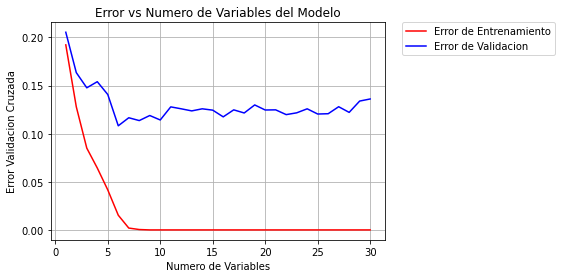

In [22]:
errores_test = np.array(errores_test) 
errores_train = np.array(errores_train) 
n = len(variables_orden_importancia)


dominio = list(range(1,n+1))
plt.plot(dominio,errores_train,'r',label="Error de Entrenamiento")
plt.plot(dominio,errores_test,'b',label="Error de Validacion")
plt.grid(True)
plt.title('Error vs Numero de Variables del Modelo')
plt.xlabel('Numero de Variables')
plt.ylabel('Error Validacion Cruzada')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

## Rendimiento del mejor modelo

In [23]:
def promedio_error_y_aciertos_modelo(datos,clase,iteraciones):

    error_modelo = 0
    porcentaje_aciertos_modelo = 0

    for i in tqdm(range(iteraciones)):
        
        datos_train , datos_test = proyecto_ml.dividir_datos(datos,0.7)

        X_train = datos_train.drop(columns = [clase])
        Y_train = datos_train[clase]

        X_test = datos_test.drop(columns = [clase])
        Y_test = datos_test[clase]
        
        bosque = RandomForestClassifier(n_estimators=N_arboles, random_state=0)
        bosque.fit(X_train,Y_train)
        
        f_test = bosque.predict(X_test)
    
        error_iteracion = proyecto_ml.error_cuadratico(f_test,Y_test) # calculamos el error cuadratico
        porcentaje_aciertos_iteracion = proyecto_ml.porcentaje_de_aciertos(f_test,Y_test) 
    
        error_modelo = error_modelo + error_iteracion
        porcentaje_aciertos_modelo = porcentaje_aciertos_modelo + porcentaje_aciertos_iteracion

    print('El modelo predijo en promedio correctamente el ' + str(porcentaje_aciertos_modelo/iteraciones) + '% de los datos de test.')
    print('El modelo tuvo en promedio un error cuadratico medio del ' + str(error_modelo/iteraciones) + '% en los datos de test.')
    
    
    

In [24]:
modelo_obesidad = datos[variables_optimas + ['obesidad']]
promedio_error_y_aciertos_modelo(modelo_obesidad,'obesidad',100)


El modelo predijo en promedio correctamente el 88.56656346749229% de los datos de test.
El modelo tuvo en promedio un error cuadratico medio del 0.11433436532507735% en los datos de test.
